<h1 style="background-color:white;font-family:rockwell;font-size:290%;text-align:center">Natural Images Classification</h1>

*********************************************************

![](im1.gif)

### Contents
* [**Abstract**](#abstract)
* [**Dataset**](#dataset)
* [**Importing Dataset and the required libraries**](#import)
* [**Information about the dataset**](#info)
* [**Classification Algorithms**](#part-b)
    * [Artificial Neural Network](#ann)
    * [Convolution Neural Network](#cnn)
* [**Conclusion**](#conclusion)

### Abstract
Image Classification is a fundamental task that attempts to comprehend an entire image as a whole. The goal is to classify the image by assigning it to a specific label. Typically, Image Classification refers to images in which only one object appears and is analyzed. In contrast, object detection involves both classification and localization tasks, and is used to analyze more realistic cases in which multiple objects may exist in an image.

Deep learning is a vast field so we’ll narrow our focus a bit and take up the challenge of solving an Image Classification project. Additionally, we’ll be using a very simple deep learning architecture to achieve a pretty impressive accuracy score.

For deploying and developing the Classification Model based on the Image Classification Dataset, I am going to use two Neural Network Algorithms. 
They are - 
> * **Artificial Neural Network (ANN)**
> * **Convolution Neural Network (CNN)**

<a id = 'dataset'></a>
### Dataset
The dataset which is used in this project, is collected from Kaggle. Here is the link of the dataset : https://www.kaggle.com/prasunroy/natural-images

<a id = 'import'></a>
### Importing the Dataset and the required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/just-for-practice/images/airplane.jfif
/kaggle/input/just-for-practice/images/cat.jfif
/kaggle/input/just-for-practice/images/download (1).jfif
/kaggle/input/just-for-practice/images/download (5).jfif
/kaggle/input/just-for-practice/images/download (3).jfif
/kaggle/input/just-for-practice/images/images (5).jfif
/kaggle/input/just-for-practice/images/images (6).jfif
/kaggle/input/just-for-practice/images/download.jfif
/kaggle/input/just-for-practice/images/images (4).jfif
/kaggle/input/just-for-practice/images/2.jfif
/kaggle/input/just-for-practice/images/images (3).jfif
/kaggle/input/just-for-practice/images/images.jfif
/kaggle/input/just-for-practice/images/images (7).jfif
/kaggle/input/just-for-practice/images/images (2).jfif
/kaggle/input/just-for-practice/images/download (4).jfif
/kaggle/input/just-for-practice/images/download (7).jfif
/kaggle/input/just-for-practice/images/download (6).jfif
/kaggle/input/just-for-practice/images/images (1).jfif
/kaggle/input/just-for

<a id = 'info'></a>
### Description about the dataset

This dataset contains 6,899 images from 8 distinct classes compiled from various sources (see Acknowledgements). The classes include airplane, car, cat, dog, flower, fruit, motorbike and person.

**Acknowledgements**
* Airplane images obtained from http://host.robots.ox.ac.uk/pascal/VOC
* Car images obtained from https://ai.stanford.edu/~jkrause/cars/car_dataset.html
* Cat images obtained from https://www.kaggle.com/c/dogs-vs-cats
* Dog images obtained from https://www.kaggle.com/c/dogs-vs-cats
* Flower images obtained from http://www.image-net.org
* Fruit images obtained from https://www.kaggle.com/moltean/fruits
* Motorbike images obtained from http://host.robots.ox.ac.uk/pascal/VOC
* Person images obtained from http://www.briancbecker.com/blog/research/pubfig83-lfw-dataset

<a id="part-b"></a>
## Classification Algorithms using Neural Networks
A classification model tries to draw some conclusion from the input values given for training. It will predict the class labels/categories for the new data.

A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In this sense, neural networks refer to systems of neurons, either organic or artificial in nature. Neural networks can adapt to changing input; so the network generates the best possible result without needing to redesign the output criteria. The concept of neural networks, which has its roots in artificial intelligence, is swiftly gaining popularity in the development of trading systems.

Here we are using two different types of neural networks -
* **Artificial Neural networks (ANN) or neural networks are computational algorithms.**

It intended to simulate the behavior of biological systems composed of “neurons”. ANNs are computational models inspired by an animal’s central nervous systems. It is capable of machine learning as well as pattern recognition. These presented as systems of interconnected “neurons” which can compute values from inputs.

* **Convolution Neural Network of CNN**

In deep learning, a convolutional neural network (CNN/ConvNet) is a class of deep neural networks, most commonly applied to analyze visual imagery. Now when we think of a neural network we think about matrix multiplications but that is not the case with ConvNet. It uses a special technique called Convolution. Now in mathematics convolution is a mathematical operation on two functions that produces a third function that expresses how the shape of one is modified by the other.

<a id = 'ann'></a>
### Artificial Neural Networks (ANN)

Artificial Neural network is typically organized in layers. Layers are being made up of many interconnected ‘nodes’ which contain an ‘activation function’. A neural network may contain the following 3 layers:
> 1. **Input Layer** : The purpose of the input layer is to receive as input the values of the explanatory attributes for each observation.
> 2. **Hidden Layer** : The Hidden layers apply given transformations to the input values inside the network. 
> 3. **Output Layer** : Output layer receives connections from hidden layers or from input layer.

![](ann.png)

In [2]:
import os
import numpy as np

In [3]:
labels=os.listdir("../input/natural-images/natural_images")
labels

['motorbike', 'airplane', 'flower', 'dog', 'fruit', 'car', 'cat', 'person']

**The dataset consists of 8 distinct clases as mentioned earlier in the information**

**Using OpenCV for this model preparation**

In [4]:
x_data =[]
y_data = []
import cv2
for label in labels:
    path = '../input/natural-images/data/natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path)
        image_resized = cv2.resize(image, (56,56)).flatten()
        x_data.append(np.array(image_resized))
        y_data.append(label)

In [5]:
x_data = np.array(x_data)
y_data = np.array(y_data)
x_data = x_data/255

**Label Encoder Applied for ANN Algorithm**

In [6]:
from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder().fit_transform(y_data)

In [7]:
r = np.arange(x_data.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = x_data[r]
Y = y_encoded[r]

<a id="train-test-split"></a>
**Training and Testing Dataset Spliting using the `train_test_split`**
  
  * Immporting the library from the sklearn.model_selection
  * Split the dataset into 70:30 ratio
  * X_train and Y_train are the trainning datasets
  * X_test and Y_test are the testing datasets
  * After the spliting of the datasets the model is ready to be prepared!

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)

**Importing `Tensorflow` and `Keras` for training the model**

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LeakyReLU

In [10]:
import matplotlib.pyplot as plt

def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """
    plt.figure(figsize=(20, 15))
    fig, axs = plt.subplots(2) 
    fig.tight_layout(pad=3.0)
    axs[0].plot(history.history["accuracy"], label="train accuracy",color="green")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy",color='blue')
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error",color="red")
    axs[1].plot(history.history["val_loss"], label="test error",color='orange')
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    plt.show()

In [11]:
model=keras.Sequential([keras.layers.Dense(8, input_shape=(9408,)),
                        keras.layers.Dense(8, input_shape=(9408,),activation='sigmoid')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Epoch 1/25
676/676 [==============================] - 3s 3ms/step - loss: 2.2213 - accuracy: 0.4459 - val_loss: 3.4635 - val_accuracy: 0.3920
Epoch 2/25
676/676 [==============================] - 1s 2ms/step - loss: 1.2327 - accuracy: 0.6531 - val_loss: 1.5237 - val_accuracy: 0.5894
Epoch 3/25
676/676 [==============================] - 1s 2ms/step - loss: 0.8839 - accuracy: 0.7170 - val_loss: 0.8939 - val_accuracy: 0.7026
Epoch 4/25
676/676 [==============================] - 1s 2ms/step - loss: 0.7148 - accuracy: 0.7430 - val_loss: 1.2792 - val_accuracy: 0.6218
Epoch 5/25
676/676 [==============================] - 2s 2ms/step - loss: 0.6752 - accuracy: 0.7564 - val_loss: 1.1978 - val_accuracy: 0.6432
Epoch 6/25
676/676 [==============================] - 2s 2ms/step - loss: 0.6616 - accuracy: 0.7641 - val_loss: 1.0941 - val_accuracy: 0.6618
Epoch 7/25
676/676 [==============================] - 2s 3ms/step - loss: 0.6184 - accuracy: 0.7847 - val_loss: 1.0084 - val_accuracy: 0.6888
Epoch 

<Figure size 1440x1080 with 0 Axes>

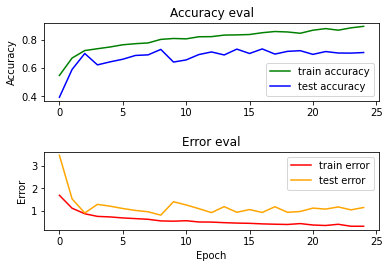

In [12]:
history=model.fit(X_train, Y_train, validation_split=0.3, batch_size=5,epochs=25)
plot_history(history)

**For ANN, Model fitted successfully, let's check the accuracy of the model**

In [13]:
model.evaluate(X_test, Y_test)
y_predicted = model.predict(X_test)

65/65 [==============================] - 0s 2ms/step - loss: 1.0785 - accuracy: 0.7275



### Confusion Matrix for ANN Model
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

Text(69.0, 0.5, 'Truth')

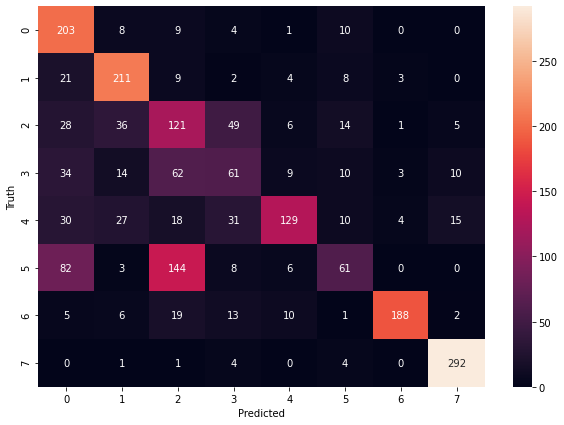

In [14]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

----------------------------

<a id = 'cnn'></a>
### Convolution Neural Network (CNN)
There are three types of layers that make up the CNN which are the convolutional layers, pooling layers, and fully-connected (FC) layers. When these layers are stacked, a CNN architecture will be formed.
> 1. **Convolution Layer** :This layer is the first layer that is used to extract the various features from the input images.
> 2. **Pooling Layer** : The primary aim of this layer is to decrease the size of the convolved feature map to reduce the computational costs.
> 3. **Fully Connected Layer** : The Fully Connected (FC) layer consists of the weights and biases along with the neurons and is used to connect the neurons between two different layers.
> 4. **Dropout** : Dit decides which information of the model should fire in the forward direction and which ones should not at the end of the network.ropout layer is utilised wherein a few neurons are dropped from the neural network during training process resulting in reduced size of the model.
> 5. **Activation Functions** : It decides which information of the model should fire in the forward direction and which ones should not at the end of the network.

![](cnn.png)

In [15]:
labels = os.listdir('../input/natural-images/data/natural_images/')
print(labels)

['motorbike', 'airplane', 'flower', 'dog', 'fruit', 'car', 'cat', 'person']


**The dataset consists of 8 distinct clases as mentioned earlier in the information**

**Using OpenCV for this model preparation**

In [16]:
x_data =[]
y_data = []
import cv2
for label in labels:
    path = '../input/natural-images/data/natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path)
        image_resized = cv2.resize(image, (64,64))
        x_data.append(np.array(image_resized))
        y_data.append(label)

In [17]:
x_data = np.array(x_data)
y_data = np.array(y_data)

In [18]:
x_data = x_data.astype('float32')/255

**Label Encoder Applied for CNN Algorithm**

In [19]:
from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder().fit_transform(y_data)
from keras.utils import to_categorical
y_categorical = to_categorical(y_encoded)

In [20]:
#lets shuffle all the data we have:
r = np.arange(x_data.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = x_data[r]
Y = y_categorical[r]

<a id="train-test-split"></a>
**Training and Testing Dataset Spliting using the `train_test_split`**
  
  * Immporting the library from the sklearn.model_selection
  * Split the dataset into 70:30 ratio
  * X_train and Y_train are the trainning datasets
  * X_test and Y_test are the testing datasets
  * After the spliting of the datasets the model is ready to be prepared!

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)

**Importing `Tensorflow` and `Keras` for training the model**

In [22]:
from tensorflow.keras.layers import LeakyReLU


In [23]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, padding='same',kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3, 3), activation=LeakyReLU(alpha=0.02)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Dense(8, activation='softmax'))

In [24]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

Epoch 1/16
725/725 [==============================] - 6s 4ms/step - loss: 1.1701 - accuracy: 0.6021 - val_loss: 0.4544 - val_accuracy: 0.8353
Epoch 2/16
725/725 [==============================] - 3s 4ms/step - loss: 0.3455 - accuracy: 0.8690 - val_loss: 0.5342 - val_accuracy: 0.8237
Epoch 3/16
725/725 [==============================] - 3s 4ms/step - loss: 0.2472 - accuracy: 0.9143 - val_loss: 0.3741 - val_accuracy: 0.8825
Epoch 4/16
725/725 [==============================] - 3s 4ms/step - loss: 0.1531 - accuracy: 0.9509 - val_loss: 0.5496 - val_accuracy: 0.8584
Epoch 5/16
725/725 [==============================] - 3s 4ms/step - loss: 0.1531 - accuracy: 0.9512 - val_loss: 0.5743 - val_accuracy: 0.8593
Epoch 6/16
725/725 [==============================] - 3s 4ms/step - loss: 0.1403 - accuracy: 0.9567 - val_loss: 0.4925 - val_accuracy: 0.8841
Epoch 7/16
725/725 [==============================] - 3s 4ms/step - loss: 0.1145 - accuracy: 0.9602 - val_loss: 0.5016 - val_accuracy: 0.8891
Epoch 

<Figure size 1440x1080 with 0 Axes>

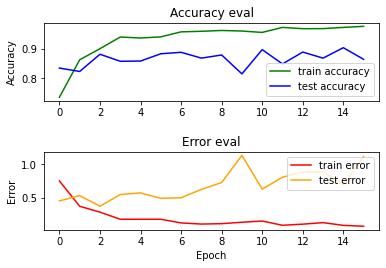

In [25]:
history=model.fit(X_train, Y_train, epochs=16, validation_split=0.25,batch_size=5 )
plot_history(history)

**For CNN, Model fitted successfully, let's check the accuracy of the model**

In [26]:
model.evaluate(X_test, Y_test)

65/65 [==============================] - 0s 3ms/step - loss: 1.1094 - accuracy: 0.8473


[1.1094059944152832, 0.8473429679870605]

******************************************

<a id = 'conclusion'></a>
## Conclusion and Comparison
We have deployed two neural network based deep learning algorithms and every algorithm is deployed successfully without any hesitation. We have checked the accuracy of the models based on the accuracy score of each of the models. Now let's take a look at the scores of each models.

|Name of the Model|Accuracy Score|
|:---:|:---:|
|Artificial Neural Network (ANN)|0.73|
|Convolution Neural Network (CNN)|0.85|


**Comparing all those scores scored by the deep learning algorithms, it is clear that Convolution Neural Network (CNN) is having the upper hand in case of this dataset, than Artificial Neural Network (ANN).**

Best Fitted Models ranking - 
1. Convolution Neural Network (CNN)
2. Artificial Neural Network (ANN)


Hooray!! The models are deployed successfully!


### Hope this project will help you! Thank you!